<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----


---  
# 🌟 **SVM**

---

## **1. El Concepto de Margen y su Importancia en SVM**

### 🎯 **¿Qué es el margen?**
Imagina que tienes dos grupos de puntos en un espacio (por ejemplo, puntos rojos y azules en un plano). El objetivo de SVM es encontrar **una línea (o un plano en dimensiones mayores) que los separe**, pero **no cualquier línea**:  
✅ Busca la **mejor separación posible**, que se traduce en **la mayor distancia posible entre los puntos más cercanos y la línea**.  
A esa distancia la llamamos **margen**.

### ⚙️ **Formalismo matemático del margen**  
Un **hiperplano** en un espacio `n`-dimensional se define como:  
$
w \cdot x + b = 0
$ 
- `w` es el **vector normal** (perpendicular) al hiperplano.  
- `x` es un punto cualquiera.  
- `b` es el sesgo (bias).  

El **margen** es la distancia **perpendicular** entre el hiperplano y los **vectores de soporte** (los puntos que están justo en el borde del margen).

La **distancia** de un punto `x` al hiperplano es:  
$
\text{Distancia} = \frac{w \cdot x + b}{\|w\|}
$

SVM quiere **maximizar el margen**, lo que equivale a **minimizar** la norma de `w` (es decir, su tamaño):  
$
\text{Minimizar} \quad \frac{1}{2} \|w\|^2
$
Sujeto a que:  
$
y_i (w \cdot x_i + b) \ge 1
$  
Esto significa que todos los puntos están **al menos** a una distancia de `1/||w||` del hiperplano.

---

Vector normal (w): [0.33333333 0.33333333]
Sesgo (b): -3.333333333333335


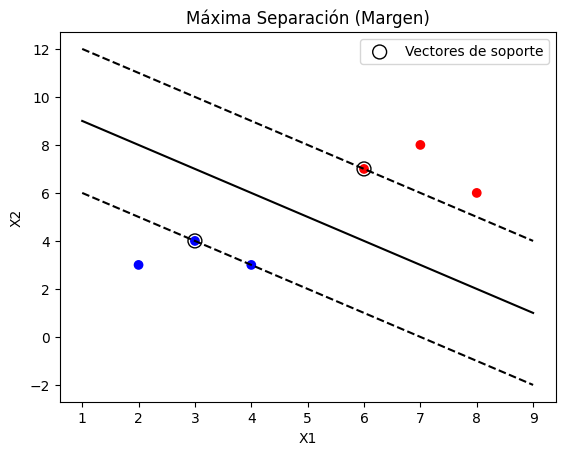

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Datos de ejemplo: dos clases separables
X = np.array([[2, 3], [3, 4], [4, 3], [6, 7], [7, 8], [8, 6]])
y = np.array([0, 0, 0, 1, 1, 1])

# Entrenamos un SVM lineal
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

def plot_svm(clf, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

    # Obtenemos los coeficientes del hiperplano
    w = clf.coef_[0]
    b = clf.intercept_[0]
    print(f'Vector normal (w): {w}')
    print(f'Sesgo (b): {b}')

    # Ecuación del hiperplano: w[0] * x + w[1] * y + b = 0
    x_plot = np.linspace(min(X[:,0])-1, max(X[:,0])+1)
    y_plot = -(w[0] * x_plot + b) / w[1]

    # Márgenes
    margin = 1 / np.linalg.norm(w)
    y_margin_up = y_plot + np.sqrt(1 + (w[0]/w[1])**2) * margin
    y_margin_down = y_plot - np.sqrt(1 + (w[0]/w[1])**2) * margin

    plt.plot(x_plot, y_plot, 'k-')             # Hiperplano
    plt.plot(x_plot, y_margin_up, 'k--')       # Margen superior
    plt.plot(x_plot, y_margin_down, 'k--')     # Margen inferior

    # Vectores de soporte
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', label='Vectores de soporte')
    
    plt.title("Máxima Separación (Margen)")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
 

plot_svm(clf, X, y)


## **2. El Papel del Producto Punto en la Construcción del Hiperplano**

### 🎯 **¿Qué hace el producto punto?**
El **producto punto** entre el vector `w` (normal al hiperplano) y cualquier punto `x` nos dice:  
✅ **En qué lado del hiperplano está el punto.**  
✅ **A qué distancia está del hiperplano (proporcionalmente).**

La regla de clasificación es:  
$
f(x) = w \cdot x + b
$ 
- Si `f(x) > 0`: el punto está en un lado (clase +1).  
- Si `f(x) < 0`: está en el otro (clase -1).  
- Si `f(x) = 0`: está **sobre** el hiperplano.

### ⚙️ **Formalismo y sentido geométrico**  
El producto punto mide la **proyección** de `x` sobre `w`.  
- Si el ángulo entre `w` y `x` es agudo, el valor es **positivo**.  
- Si es obtuso, el valor es **negativo**.


In [8]:
# Vector normal y bias del modelo entrenado
w = clf.coef_[0]
b = clf.intercept_[0]

# Función de decisión
def decision_function(x):
    return np.dot(w, x) + b

# Puntos de prueba
puntos_prueba = np.array([[5, 5], [7, 7], [3, 2]])

for punto in puntos_prueba:
    valor = decision_function(punto)
    clase = 1 if valor > 0 else 0
    print(f"Punto {punto}: w·x + b = {valor:.2f} => Clase predicha: {clase}")

Punto [5 5]: w·x + b = 0.00 => Clase predicha: 1
Punto [7 7]: w·x + b = 1.33 => Clase predicha: 1
Punto [3 2]: w·x + b = -1.67 => Clase predicha: 0


Vector normal (w): [0.33333333 0.33333333]
Sesgo (b): -3.333333333333335


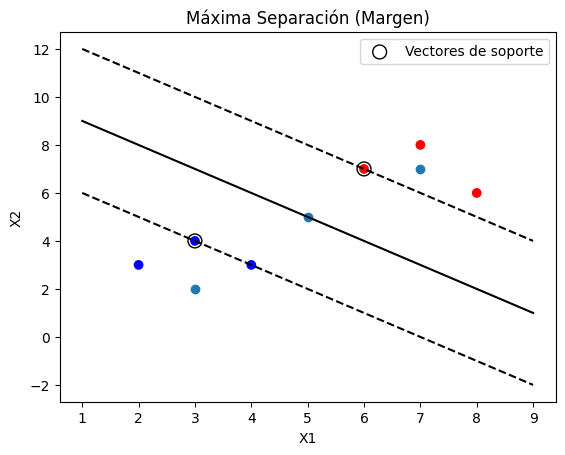

In [9]:
plot_svm(clf, X, y)
plt.scatter(puntos_prueba[:,0],puntos_prueba[:,1])

🔧 **Explicación**:  
- Calculamos `w · x + b`.  
- Si el resultado es positivo o negativo, clasificamos el punto en una clase u otra.  
- Este valor también te dice **qué tan lejos** está del hiperplano.

## REPASO
En un SVM **lineal**, el **producto punto** aparece cuando calculamos:
$
f(x) = w \cdot x + b
$

Durante el entrenamiento de SVM, la solución óptima **w** se expresa **como una combinación lineal** de los vectores de soporte:

$
w = \sum_{i=1}^{N} \alpha_i y_i x_i
$

Por lo tanto, el **modelo final** para clasificar un nuevo dato `x` es:

$
f(x) = \sum_{i=1}^{N} \alpha_i y_i (x_i \cdot x) + b
$

🔸 El **producto punto** $ x_i \cdot x $ es clave porque mide la **similitud** entre el nuevo punto `x` y los vectores de soporte `x_i`.

---


# 🚀 **¿Qué Pasa Cuando los Datos NO Son Lineales?**
Hay veces que **NO** podemos separar los datos con un hiperplano en el espacio original.  
**Solución clásica:** Transformamos los datos a un **espacio de mayor dimensión** donde sí puedan separarse **linealmente**.

Por ejemplo:
- Un dato en 2D `x = [x1, x2]`
- Lo transformamos a un espacio 3D con `φ(x) = [x1, x2, x1^2 + x2^2]`

En este espacio más alto, los datos **sí** pueden separarse linealmente.

---

# ⚠️ **El Problema**
Calcular `φ(x)` **explícitamente** puede ser **muy costoso** si el espacio es grande o infinito (¡sí, infinito!).

---


### 👉 Abordemos el problema empleando un  **kernel polinómico** de grado 2
El kernel polinómico se define como:  
$
K(x_i, x_j) = (\langle x_i, x_j \rangle + c)^d
$ 
Donde:  
- $ \langle x_i, x_j \rangle $ es el **producto punto** en el espacio original.  
- $ c $ es un **coeficiente libre** (lo podemos poner como 0 o 1).  
- $ d $ es el **grado del polinomio**.

🔸 Si usamos **grado 2** y $ c = 0 $, se simplifica a:  
$
K(x_i, x_j) = (\langle x_i, x_j \rangle)^2
$

---

# ✏️ **Datos de Ejemplo**
Tomemos dos vectores en **2 dimensiones**:  
$
x_i = [1, 2]  
$  
$
x_j = [3, 4]  
$

---
$
\langle x_i, x_j \rangle = (1)(3) + (2)(4) = 3 + 8 = 11
$

# ✅ **Cálculo del Kernel Polinómico**
Aplicamos el kernel polinómico de grado 2 (con \( c = 0 \)):  
$
K(x_i, x_j) = (11)^2 = 121
$
➡️ **¡Listo! Ya usamos el truco del kernel sin transformar nada!**

# ✅ **¿Qué pasa en el Espacio Transformado?**
Cuando aplicamos un **kernel polinómico de grado 2**, **equivale** a una transformación φ(x) que incluye:  

- Las características **originales** (lineales): $x_1$, $x_2$  
- Sus **cuadrados**: $x_1^2$, $x_2^2$  
- El **producto cruzado**: $ \sqrt{2} \cdot x_1 x_2 $

Esto se llama un **mapeo explícito** en un **espacio de dimensión mayor**.  
Aquí, por simplicidad, tomamos:  

$
φ(x) = [x_1^2, \sqrt{2} x_1 x_2, x_2^2]
$

🔸 Para **x_i = [1, 2]**, su transformación φ(x_i):  
$
φ(x_i) = [1^2, \sqrt{2} \cdot 1 \cdot 2, 2^2] = [1, 2\sqrt{2}, 4]
$

🔸 Para **x_j = [3, 4]**, su transformación φ(x_j):  
$
φ(x_j) = [3^2, \sqrt{2} \cdot 3 \cdot 4, 4^2] = [9, 12\sqrt{2}, 16]
$


# ✅ **Producto Punto en el Espacio Transformado**
Ahora calculamos el **producto punto explícito** de φ(x_i) y φ(x_j):  

$
φ(x_i) \cdot φ(x_j) = (1)(9) + (2\sqrt{2})(12\sqrt{2}) + (4)(16)
$

✅ Hacemos los cálculos:  
- $ (1)(9) = 9 $  
- $ (2\sqrt{2})(12\sqrt{2}) = 2 \cdot 12 \cdot (\sqrt{2})^2 = 24 \cdot 2 = 48 $  
- $(4)(16) = 64 $

🔸 Sumamos:  
$
9 + 48 + 64 = 121
$

El **producto punto** en el espacio transformado **φ(x)** es **121**,  
el **mismo valor** que nos dio el **kernel polinómico**:

$
K(x_i, x_j) = 121
$

🔸 **¡Así es como funciona el truco del kernel!**  
No necesitas construir φ(x), solo usas el **kernel function**.


In [11]:
import numpy as np

# Vectores originales
x_i = np.array([1, 2])
x_j = np.array([3, 4])

# Producto punto original
dot_product = np.dot(x_i, x_j)
print(f"Producto punto en espacio original: {dot_product}")

# Kernel polinómico grado 2, c=0
kernel_poly = (dot_product) ** 2
print(f"Kernel polinómico (grado 2): {kernel_poly}")

# Mapeo explícito en el espacio transformado
def phi(x):
    return np.array([x[0]**2, np.sqrt(2) * x[0] * x[1], x[1]**2])

phi_xi = phi(x_i)
phi_xj = phi(x_j)

# Producto punto en espacio transformado
dot_phi = np.dot(phi_xi, phi_xj)
print(f"Producto punto en espacio transformado explícito: {dot_phi}")

Producto punto en espacio original: 11
Kernel polinómico (grado 2): 121
Producto punto en espacio transformado explícito: 121.0


---

# **Qué Aprendimos??**
| Concepto                     | Intuición                                       |
|------------------------------|-------------------------------------------------|
| **Producto punto en espacio original** | Compara directamente las características lineales. |
| **Espacio transformado φ(x)**| Crea nuevas combinaciones de características (no lineales). |
| **Kernel polinómico**        | Calcula el **producto punto** en ese espacio transformado **sin calcular φ(x)** explícitamente. |
| **Truco del kernel**         | Ahorra tiempo y computo al evitar la transformación directa. |



---
---

# 🔎 **Ejemplo en python: Qué Hace Este Código?**
- Generamos **dos clases** de puntos 2D:  
  - Una nube alrededor de (0, 0)  
  - Otra alrededor de (-1, -1) y (1,1)

- Aplicamos la **transformación explícita** del **kernel polinómico de grado 2**:  

$
φ(x) = [x_1^2, \sqrt{2} \cdot x_1 \cdot x_2, x_2^2]
$

- Mostramos:
  1. **Espacio original** en 2D (subplot izquierdo).  
  2. **Espacio transformado** en 3D (subplot derecho).



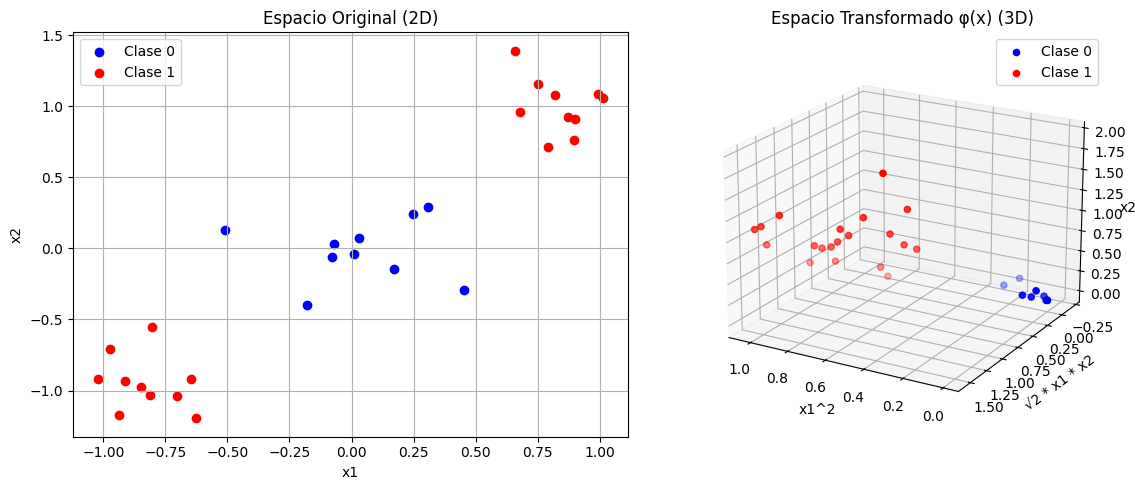

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------
# 1. Generamos datos simples en 2D
# ----------------------
np.random.seed(0)
sigma = 0.2
# Dos clases de puntos
X_class1 = sigma*np.random.randn(10, 2) + np.array([0, 0])    # Clase 1

X_class2 = sigma*np.random.randn(10, 2) + np.array([-1, -1])  # Clase 2
X_class2 = np.vstack([X_class2, sigma*np.random.randn(10, 2) + np.array([1, 1])])    # Clase 2

# Etiquetas
y_class1 = np.zeros(10)
y_class2 = np.ones(10)

# Unimos todo
X = np.vstack([X_class1, X_class2])
y = np.hstack([y_class1, y_class2,y_class2 ])

# ----------------------
# 2. Definimos la transformación φ(x)
# ----------------------
def phi_polynomial_2d(x):
    """
    Transformación explícita del kernel polinomial de grado 2
    φ(x) = [x1^2, sqrt(2)*x1*x2, x2^2]
    """
    x1 = x[:, 0]
    x2 = x[:, 1]
    return np.vstack([x1**2, np.sqrt(2)*x1*x2, x2**2]).T

# Aplicamos la transformación
X_transformed = phi_polynomial_2d(X)

# ----------------------
# 3. Visualización en subplots
# ----------------------
fig = plt.figure(figsize=(12, 5))

# Subplot 1: Datos originales (2D)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Clase 0')
ax1.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Clase 1')
ax1.set_title("Espacio Original (2D)")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.legend()
ax1.grid(True)

# Subplot 2: Datos transformados (3D)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(
    X_transformed[y == 0, 0],
    X_transformed[y == 0, 1],
    X_transformed[y == 0, 2],
    color='blue', label='Clase 0'
)
ax2.scatter(
    X_transformed[y == 1, 0],
    X_transformed[y == 1, 1],
    X_transformed[y == 1, 2],
    color='red', label='Clase 1'
)
ax2.set_title("Espacio Transformado φ(x) (3D)")
ax2.set_xlabel("x1^2")
ax2.set_ylabel("√2 * x1 * x2")
ax2.set_zlabel("x2^2")
ax2.legend()
ax2.view_init(elev=20, azim=120)  # Cambia la vista para mejor perspectiva

plt.tight_layout()
plt.show()


# 🔥 **Kernel de Base Radial (RBF)**
El kernel **RBF** es uno de los **más usados en SVM** porque **proyecta** los datos en un **espacio de infinitas dimensiones**.  

---

## ✅ **Fórmula del Kernel RBF**
El **Kernel RBF** entre dos vectores $ x_i $ y $ x_j $ se define como:  

$
K(x_i, x_j) = \exp \left( - \dfrac{\| x_i - x_j \|^2}{2\sigma^2} \right)
$

O también (forma más común en Machine Learning):  

$
K(x_i, x_j) = \exp \left( - \gamma \| x_i - x_j \|^2 \right)
$

Donde:  
- $ \| x_i - x_j \|^2 $: es la **distancia euclidiana al cuadrado** entre $ x_i $ y $ x_j $.  
- $ \gamma $: controla **la forma del kernel**, es decir, qué tan lejos afecta cada punto.  
  - Si $ \gamma $ es **grande**, los puntos lejanos tienen **influencia casi cero**.  
  - Si $ \gamma $ es **pequeño**, los puntos **lejanos** todavía influyen.



🔑 **Intuición**:  
- Dos puntos **muy cercanos** tienen **similaridad alta** (cerca de 1).  
- Dos puntos **lejanos** tienen **similaridad baja** (cerca de 0).


-------

# ✅ **Expansión en Series de Taylor de la Exponencial**

La función exponencial tiene la **expansión en series de Taylor**:

$
\exp(z) = \sum_{n=0}^{\infty} \frac{z^n}{n!}
$

En nuestro caso:
$
\exp\left( 2\gamma x_i^\top x_j \right) = \sum_{n=0}^{\infty} \frac{ \left( 2\gamma x_i^\top x_j \right)^n }{n!}
$

➡️ Es decir, el **RBF** es **una suma infinita de polinomios** en $ x_i^\top x_j $, cada uno de **grado n**.

➡️ Lo podemos pensar como **una combinación de kernels polinómicos de todos los grados**, con **coeficientes decrecientes** (factorados por $ n! $).

---

# ✅**Interpretación**
| Kernel | Qué hace |
|--------|----------|
| **Polinómico** de grado $ d $ | Toma el **producto punto** $ x_i^\top x_j $ y lo **eleva a la potencia d**. Tiene **un solo grado** en su expansión. |
| **RBF** | Es como un **kernel polinómico de grado infinito**, donde los términos de mayor grado **pesan menos** gracias al **factor $ n! $** en el denominador. Esto **suaviza** la influencia de los grados altos.

➡️ Por eso, el RBF puede **capturar relaciones complejas** sin **necesitar elegir explícitamente un grado d**, porque **los incluye todos**, ponderados correctamente.

---

# ✅ **Interpretación del Kernel RBF**
➡️ El kernel RBF **mide la similaridad** de dos puntos basándose en su **distancia**.  
➡️ Al usarlo en un SVM, estamos diciendo:  
_"Clasifica los puntos según su **cercanía** a otros puntos de referencia (los vectores de soporte), en un espacio donde cada punto genera un 'campo de influencia' en forma de campana (gaussiana)."_  

---

# ✏️ **Ejemplo Matemático Sencillo**
Supongamos dos puntos en 2D:  
$
x_i = [1, 2]  
$ 
$
x_j = [2, 3]  
$

Vamos a calcular el **kernel RBF** con $ \gamma = 0.5$.

1. Calculamos la **distancia cuadrada**:  
$
\| x_i - x_j \|^2 = (1-2)^2 + (2-3)^2 = 1 + 1 = 2
$

2. Aplicamos la fórmula:  
$
K(x_i, x_j) = \exp( - 0.5 \times 2 ) = \exp(-1) \approx 0.3679
$

➡️ **Interpretación**: Estos puntos **no son tan similares**, porque la distancia es 2.

---

# ✅ **Visualización e Intuición en Python**


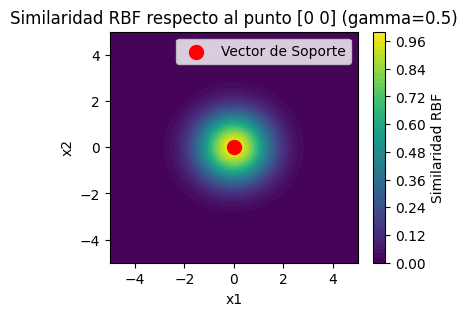

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Generar una grilla de puntos en 2D
# -----------------------------
x_min, x_max = -5, 5
y_min, y_max = -5, 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Creamos una matriz de puntos (N, 2)
points = np.c_[xx.ravel(), yy.ravel()]

# -----------------------------
# 2. Definir el punto central (el "vector de soporte")
# -----------------------------
x_support = np.array([0, 0])

# -----------------------------
# 3. Función Kernel RBF
# -----------------------------
def rbf_kernel(x, center, gamma=0.5):
    # Distancia cuadrada de cada punto al centro
    sq_dist = np.sum((x - center)**2, axis=1)
    # Similaridad
    return np.exp(-gamma * sq_dist)

# -----------------------------
# 4. Calcular la similaridad para cada punto de la grilla
# -----------------------------
gamma_value = 0.5
similarity = rbf_kernel(points, x_support, gamma=gamma_value)

# -----------------------------
# 5. Visualización del "campo de influencia"
# -----------------------------
similarity_grid = similarity.reshape(xx.shape)

plt.figure(figsize=(4,3))
plt.contourf(xx, yy, similarity_grid, levels=50, cmap='viridis')
plt.colorbar(label='Similaridad RBF')
plt.scatter(x_support[0], x_support[1], color='red', s=100, label='Vector de Soporte')
plt.title(f'Similaridad RBF respecto al punto {x_support} (gamma={gamma_value})')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


- El **punto rojo** es el **vector de soporte** $ x_{support} $.  
- Los **colores** representan la **similaridad** de cada punto de la grilla respecto a $ x_{support} $:  
  - **Más amarillo/verde claro** = mayor similaridad (cerca del soporte).  
  - **Más azul oscuro** = menor similaridad (lejos del soporte).

🔑 **Interpretación práctica**:  
- El kernel RBF genera una especie de **campo de influencia** alrededor de cada punto de soporte.  
- Los puntos **cerca** tienen **mayor peso** en la clasificación.


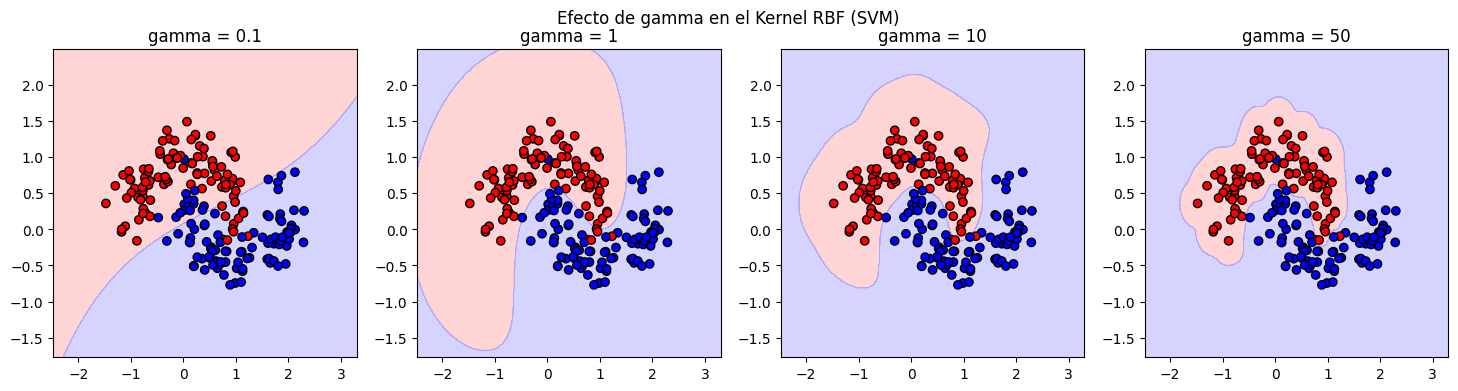

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# -----------------------------
# 1. Crear datos de ejemplo
# -----------------------------
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# -----------------------------
# 2. Definir función para graficar la frontera de decisión
# -----------------------------
def plot_decision_boundary(model, X, y, ax, title):
    # Generar una malla de puntos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Predecir la clase para cada punto de la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Graficar el contorno y los puntos de datos
    ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# -----------------------------
# 3. Entrenar SVMs con distintos valores de gamma
# -----------------------------
gammas = [0.1, 1, 10, 50]

fig, axes = plt.subplots(1, len(gammas), figsize=(18, 4))

for ax, gamma in zip(axes, gammas):
    # Crear el modelo SVM con kernel RBF y gamma específico
    model = SVC(kernel='rbf', gamma=gamma, C=1)
    model.fit(X, y)
    
    # Graficar el resultado
    plot_decision_boundary(model, X, y, ax, f'gamma = {gamma}')

plt.suptitle('Efecto de gamma en el Kernel RBF (SVM)')
plt.show()


## **SVM para Regresión (SVR)**

SVM también puede usarse para **regresión**. En vez de buscar un hiperplano que **clasifique**, busca una **función** que **aproxime los datos** y permita un margen de tolerancia (epsilon).

### ⚙️ **Formalismo Básico**
SVR intenta encontrar una función `f(x)` tal que:  

$
|y_i - f(x_i)| \leq \epsilon
$

Y minimiza la complejidad de `w` (como antes). Los puntos fuera del margen epsilon **pagan un costo**.


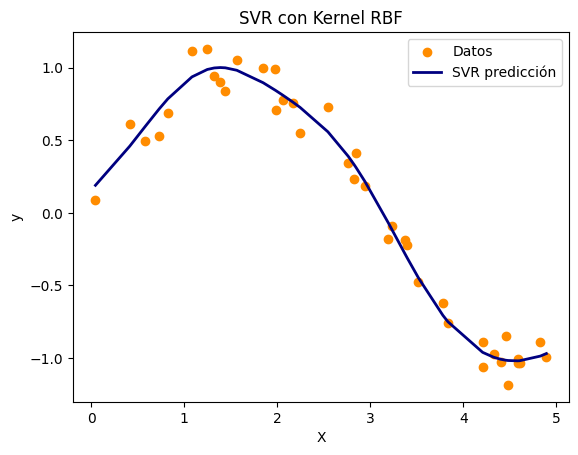

In [31]:
from sklearn.svm import SVR

# Datos simulados
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(*X.shape).ravel() * 0.1

# SVR con kernel RBF
svr_rbf = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_rbf.fit(X, y)

# Predicciones
y_pred = svr_rbf.predict(X)

# Visualización
plt.scatter(X, y, color='darkorange', label='Datos')
plt.plot(X, y_pred, color='navy', lw=2, label='SVR predicción')
plt.title("SVR con Kernel RBF")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()